In [3]:
import torch

import numpy as np
import xarray as xr 
from hydra import compose, initialize_config_dir
from omegaconf import OmegaConf
import lightning as pl
import hydra
import torch
import glob
import os 
work = os.environ['WORK']
with initialize_config_dir(config_dir=f"{work}/ipsl_dcpp/ipsl_dcpp/conf"):
    cfg = compose(config_name="config")
device = 'cuda'

pl.seed_everything(cfg.seed)
train = hydra.utils.instantiate(
    cfg.dataloader.dataset,domain='train',debug=True
)
metric_output = torch.rand((5,34))


/tmp/xpython_887407/69396767.py:13: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize_config_dir(config_dir=f"{work}/ipsl_dcpp/ipsl_dcpp/conf"):
[rank: 0] Seed set to 0
2it [00:07,  3.89s/it]


In [11]:
import pandas as pd

df = pd.DataFrame(metric_output.numpy())

In [17]:
var_names = train.surface_variables.copy()
plev_var_names = [[x+'_850',x+'_750',x+'_500'] for x in train.plev_variables]
for x in plev_var_names:
    for name in x:
        var_names.append(name)
# var_names = [(var_names[index], 0, index) for index in range(len(var_names))]

In [18]:
df.columns = var_names

In [7]:
metrics_names = ['error','var','spskr','crps','sharpness']

In [15]:
df.index = metrics_names

In [19]:
df

,tas,npp,nbp,gpp,cVeg,evspsbl,mrfso,mrro,ps,tos,...,ua_500,va_850,va_750,va_500,wap_850,wap_750,wap_500,zg_850,zg_750,zg_500
error,0.496257,0.768222,0.088477,0.132030,0.307423,0.634079,0.490093,0.896445,0.455628,0.632306,...,0.419408,0.552907,0.952738,0.036165,0.185231,0.373417,0.305100,0.932000,0.175910,0.269834
var,0.150680,0.031720,0.208130,0.929799,0.723109,0.742336,0.526296,0.243658,0.584592,0.033153,...,0.153457,0.241708,0.726237,0.701080,0.203824,0.651054,0.774486,0.436891,0.519091,0.615852
spskr,0.810188,0.980097,0.114688,0.316765,0.696505,0.914275,0.935104,0.941178,0.599507,0.065209,...,0.857936,0.686956,0.005132,0.175652,0.749658,0.604651,0.109958,0.212090,0.970375,0.836909
crps,0.281987,0.374158,0.023701,0.491013,0.123471,0.114322,0.472450,0.575073,0.295235,0.796689,...,0.374835,0.256443,0.325083,0.090189,0.393642,0.606878,0.174267,0.474340,0.857925,0.448600
sharpness,0.513896,0.456866,0.601191,0.817920,0.973623,0.817528,0.974707,0.463839,0.050839,0.262961,...,0.403692,0.401829,0.051325,0.068281,0.421760,0.506466,0.272863,0.688350,0.049971,0.466256


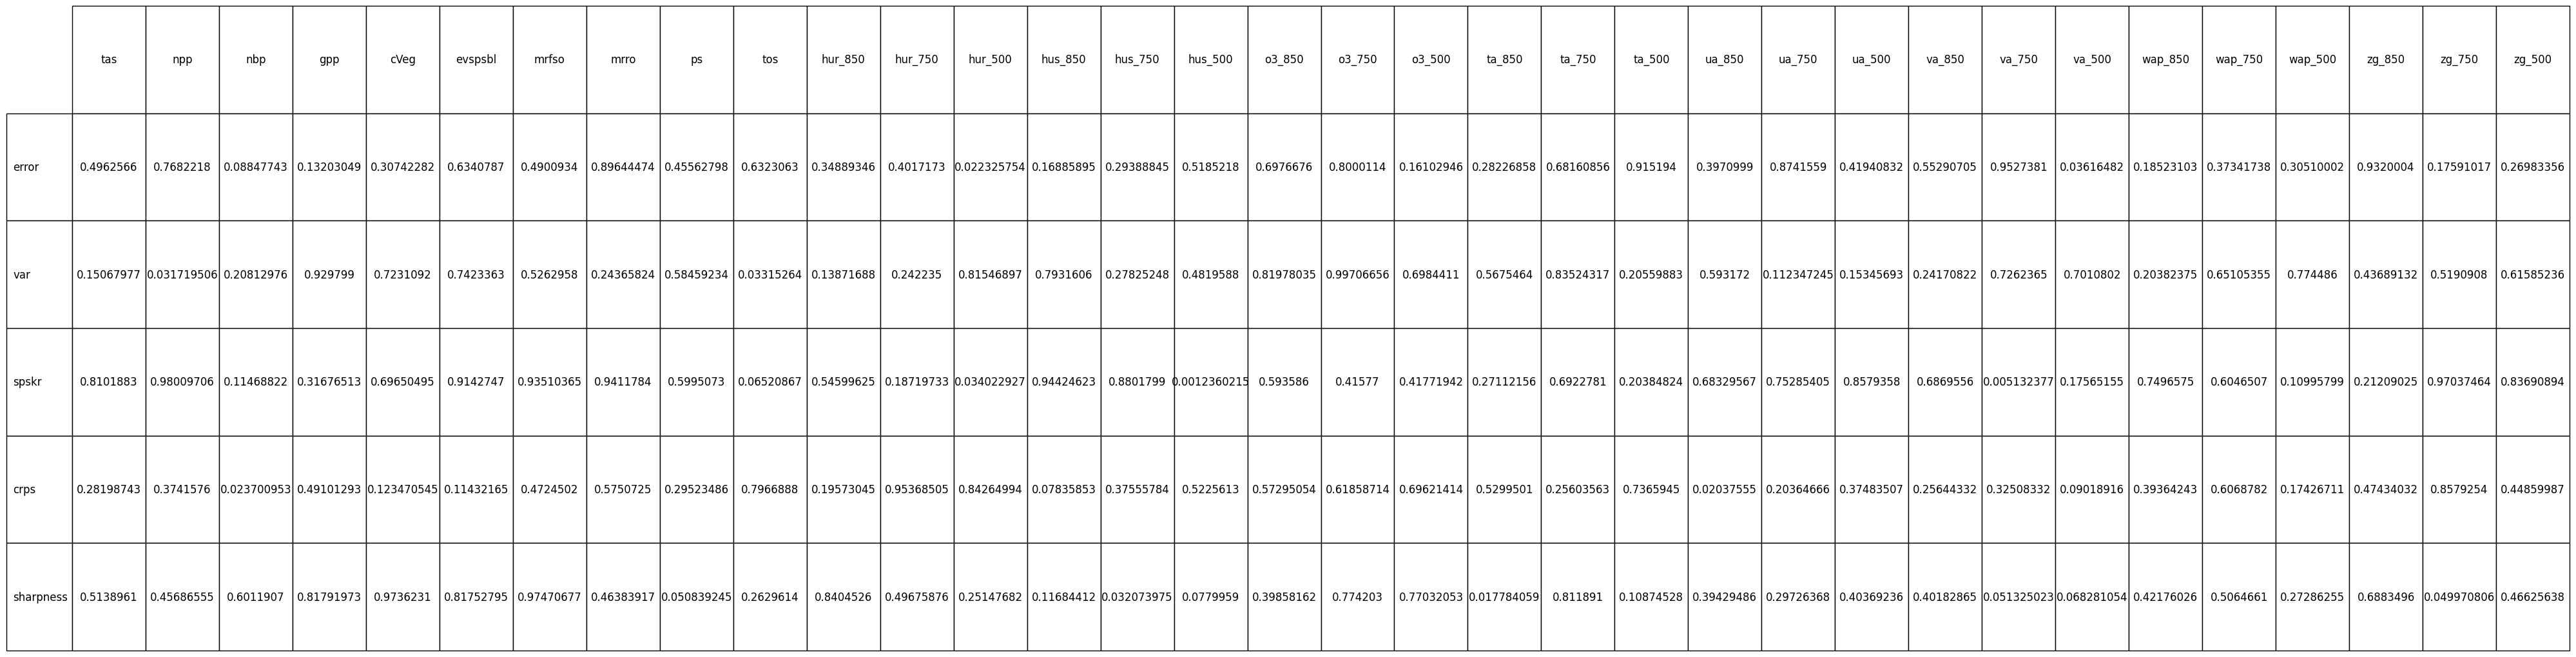

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 2))  # Adjust the size as needed

# Hide the axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)  # No boundary box

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index,cellLoc='center', loc='center')

# Adjust table font size
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(10, 10)  # Adjust scaling as needed

# Save the table as an image
plt.savefig('table_image.png', bbox_inches='tight', dpi=300)  # Save as PNG (use 'table_image.jpg' for JPEG)

# plt.show()